# Spotitfy Billboard


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import eda_aid as ea
import numpy as np
import seaborn as sns
import math

import ipywidgets as widgets
from IPython.display import display
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
file =  '../data/billboard_24years_lyrics_spotify.csv'
df = pd.read_csv(file)
df = df[~df['danceability'].isna()]
df = df.drop_duplicates(subset='songurl', keep='first')
ed = ea.eda_aid(df)

EDA Aid initialized with 419 rows and 26 columns:
 - Numeric: 15
 - Object: 11
 - Boolean: 0
 - Datetime: 0


In [3]:
ed.columns_df()

,type,missing_count,missing_proportions,non_missing_count,unique_values
name,,,,,
ranking,numeric,0,0.0,419,99
year,numeric,0,0.0,419,8
danceability,numeric,0,0.0,419,297
energy,numeric,0,0.0,419,282
key,numeric,0,0.0,419,12
loudness,numeric,0,0.0,419,405
mode,numeric,0,0.0,419,2
speechiness,numeric,0,0.0,419,318
acousticness,numeric,0,0.0,419,376


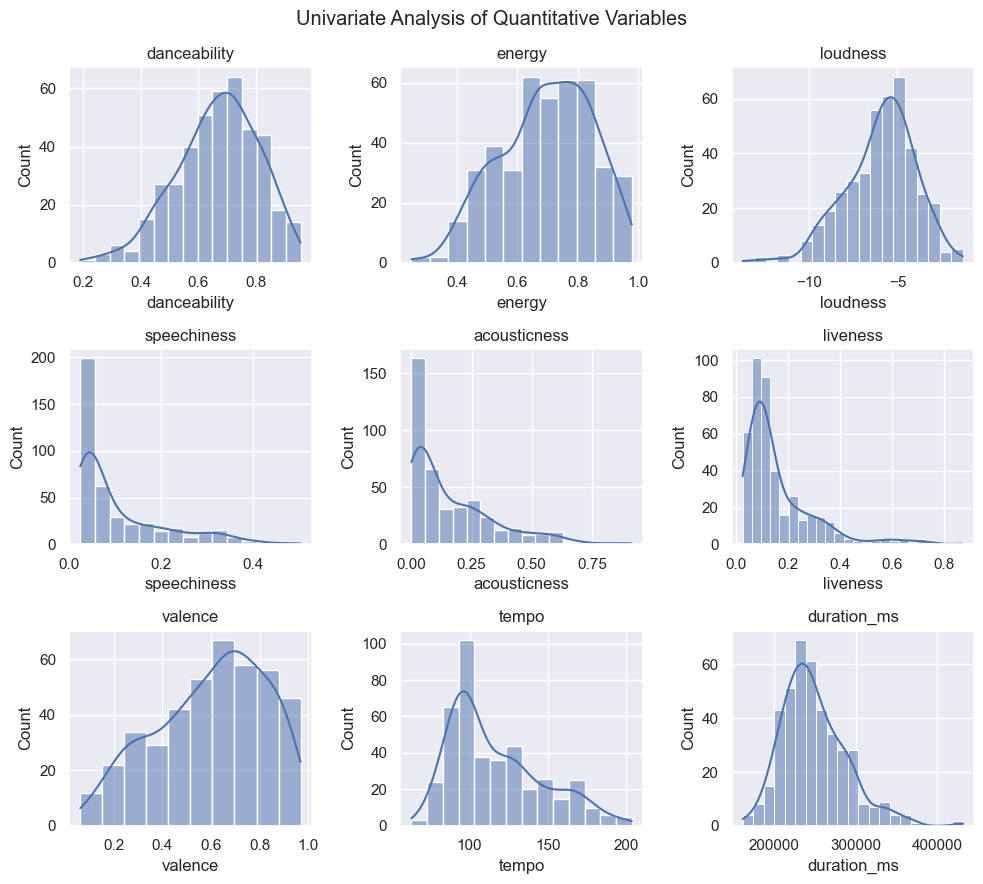

In [4]:
X_cols = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence','tempo','duration_ms']
ed.eda_quant_uni(X_cols)

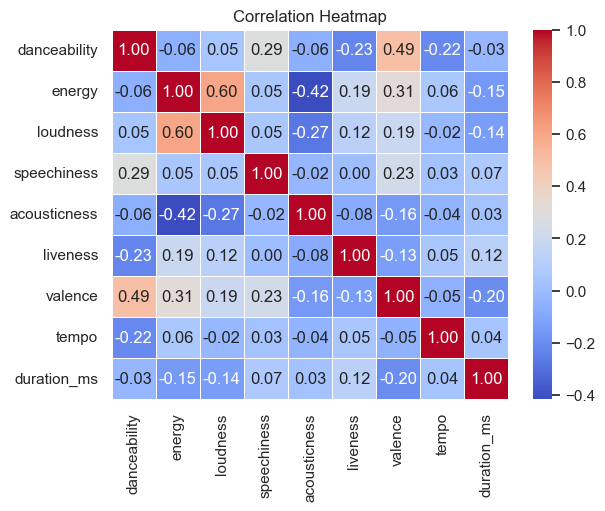

In [5]:
correlation_matrix = df[X_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Calculating Distance from every music and the center of the mainstream.

In [6]:
X = df[X_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
center = np.mean(X_scaled, axis=0)
distances = np.linalg.norm(X_scaled - center, axis=1)
df['distance_from_center'] = distances
df['obviouness'] = 1/distances
df.sort_values('obviouness').head()

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,distance_from_center,obviouness
545,19,My Immortal,Evanescence,/wiki/My_Immortal_(song),My Immortal,/wiki/Evanescence,2004,I'm so tired of being here\nSuppressed by all ...,spotify:track:4UzVcXufOhGUwF56HT7b8M,0.190,...,0.101,79.012,audio_features,4UzVcXufOhGUwF56HT7b8M,https://api.spotify.com/v1/tracks/4UzVcXufOhGU...,https://api.spotify.com/v1/audio-analysis/4UzV...,262533.0,4.0,1.336627,0.748152
191,59,Only Time,Enya,/wiki/Only_Time,Only Time,/wiki/Enya,2001,Who can say where the road goes?\nWhere the da...,spotify:track:6FLwmdmW77N1Pxb1aWsZmO,0.418,...,0.213,82.803,audio_features,6FLwmdmW77N1Pxb1aWsZmO,https://api.spotify.com/v1/tracks/6FLwmdmW77N1...,https://api.spotify.com/v1/audio-analysis/6FLw...,218547.0,4.0,1.304018,0.766861
263,18,I Need a Girl (Part Two),P. Diddy,/wiki/I_Need_a_Girl_(Part_Two),I Need a Girl (Part Two),/wiki/Sean_Combs,2002,"(Youngsta!)\nUh\n(Young Shaney Jay, he the plu...",spotify:track:2fo5h8qGykQkwXBLdktENs,0.590,...,0.792,199.750,audio_features,2fo5h8qGykQkwXBLdktENs,https://api.spotify.com/v1/tracks/2fo5h8qGykQk...,https://api.spotify.com/v1/audio-analysis/2fo5...,286043.0,4.0,1.062552,0.941130
225,88,It's a Great Day to Be Alive,Travis Tritt,/wiki/It%27s_a_Great_Day_to_Be_Alive,It's a Great Day to Be Alive,/wiki/Travis_Tritt,2001,I got rice cookin' in the microwave\nGot a thr...,spotify:track:2wOtNLScRaNewSnBYhej87,0.336,...,0.536,140.770,audio_features,2wOtNLScRaNewSnBYhej87,https://api.spotify.com/v1/tracks/2wOtNLScRaNe...,https://api.spotify.com/v1/audio-analysis/2wOt...,249987.0,4.0,1.053720,0.949019
558,29,You Don't Know My Name,Alicia Keys,/wiki/You_Don%27t_Know_My_Name,You Don't Know My Name,/wiki/Alicia_Keys,2004,"Baby, baby, baby\nFrom the day I saw you\nI re...",spotify:track:6LGwYMXXgURfaequXipzHx,0.264,...,0.249,167.078,audio_features,6LGwYMXXgURfaequXipzHx,https://api.spotify.com/v1/tracks/6LGwYMXXgURf...,https://api.spotify.com/v1/audio-analysis/6LGw...,366733.0,4.0,1.031677,0.969296


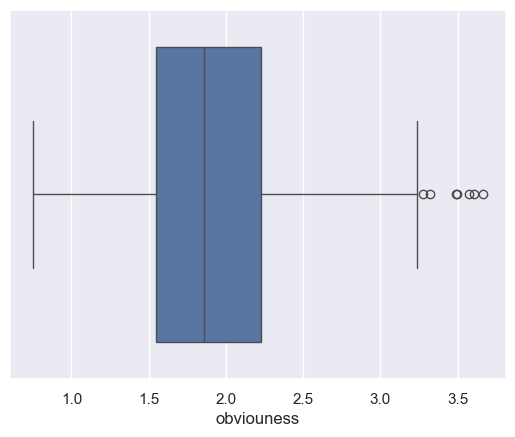

In [10]:
sns.boxplot(df['obviouness'], orient='h')
plt.show()

In [11]:
p25 = df['obviouness'].quantile(0.25)
p75 = df['obviouness'].quantile(0.75)
iiq = p75-p25

limite_inferior = p25-1.5*iiq
limite_superior = p75+1.5*iiq

In [13]:
df[df['obviouness']>limite_superior].sort_values('obviouness', ascending=False)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,distance_from_center,obviouness
300,42,No Such Thing,John Mayer,/wiki/No_Such_Thing_(John_Mayer_song),No Such Thing,/wiki/John_Mayer,2002,"""Welcome to the real world"", she said to me\nC...",spotify:track:6Vecwo7AHst9V2CE3kmwr0,0.668,...,0.571,131.918,audio_features,6Vecwo7AHst9V2CE3kmwr0,https://api.spotify.com/v1/tracks/6Vecwo7AHst9...,https://api.spotify.com/v1/audio-analysis/6Vec...,231467.0,4.0,0.272685,3.667235
567,35,She Will Be Loved,Maroon 5,/wiki/She_Will_Be_Loved,She Will Be Loved,/wiki/Maroon_5,2004,Beauty queen of only eighteen\nShe had some tr...,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,...,0.465,102.000,audio_features,4llK75pXNWZz6KAho2Gp16,https://api.spotify.com/v1/tracks/4llK75pXNWZz...,https://api.spotify.com/v1/audio-analysis/4llK...,259453.0,4.0,0.277502,3.603572
362,89,Full Moon,Brandy,/wiki/Full_Moon_(Brandy_Norwood_song),Full Moon,/wiki/Brandy_Norwood,2002,"Boy, I saw you soon as you came bouncin' throu...",spotify:track:0pLmfgIANOX9FB9uZDU43x,0.692,...,0.629,105.994,audio_features,0pLmfgIANOX9FB9uZDU43x,https://api.spotify.com/v1/tracks/0pLmfgIANOX9...,https://api.spotify.com/v1/audio-analysis/0pLm...,248933.0,4.0,0.279941,3.572184
133,15,U Remind Me,Usher,/wiki/U_Remind_Me,U Remind Me,/wiki/Usher_(musician),2001,"Yo, I ain't seen you in a minute\nBut I got so...",spotify:track:2QsZVnbWVSjKMXK6K3uRBL,0.657,...,0.726,93.985,audio_features,2QsZVnbWVSjKMXK6K3uRBL,https://api.spotify.com/v1/tracks/2QsZVnbWVSjK...,https://api.spotify.com/v1/audio-analysis/2QsZ...,266893.0,4.0,0.286057,3.495812
176,48,Promise,Jagged Edge,/wiki/Promise_(Jagged_Edge_song),Promise,/wiki/Jagged_Edge_(American_group),2001,Nothing is promised to me and you\nSo why will...,spotify:track:1X1KDnhTnb28tpJlgOV3lD,0.751,...,0.646,128.002,audio_features,1X1KDnhTnb28tpJlgOV3lD,https://api.spotify.com/v1/tracks/1X1KDnhTnb28...,https://api.spotify.com/v1/audio-analysis/1X1K...,246720.0,4.0,0.286565,3.489606
38,34,It Feels So Good,Sonique,/wiki/It_Feels_So_Good,It Feels So Good,/wiki/Sonique_(musician),2000,You always make me smile when I'm feeling down...,spotify:track:4Y8q64VnhD0vFYy9g2WFpi,0.634,...,0.558,135.012,audio_features,4Y8q64VnhD0vFYy9g2WFpi,https://api.spotify.com/v1/tracks/4Y8q64VnhD0v...,https://api.spotify.com/v1/audio-analysis/4Y8q...,240867.0,4.0,0.300961,3.322691
291,35,Soak Up the Sun,Sheryl Crow,/wiki/Soak_Up_the_Sun,Soak Up the Sun,/wiki/Sheryl_Crow,2002,My friend the communist\nHolds meetings in his...,spotify:track:215JYyyUnrJ98NK3KEwu6d,0.717,...,0.713,119.996,audio_features,215JYyyUnrJ98NK3KEwu6d,https://api.spotify.com/v1/tracks/215JYyyUnrJ9...,https://api.spotify.com/v1/audio-analysis/215J...,292307.0,4.0,0.305366,3.274763


In [14]:
def compare(df, id, quant_var=None) -> None:
    n_graphs = len(quant_var)
    n_row = math.ceil(n_graphs / 3)
    fig, axes = plt.subplots(nrows = n_row, ncols = 3, figsize=(10,n_row*3)) 
    axes=axes.flatten()
    temp = df[df['id']== id]
    song = temp['song'].values[0]
    singer = temp['band_singer'].values[0]
    title_text = f'{song} by {singer}'
    fig.suptitle(title_text)
    for v, ax in zip(quant_var, axes):
        sns.histplot(data=df, x = v, ax = ax, kde=True)
        ax.axvline(x=temp[v].values, color='red', linestyle='--', linewidth=1.5)
        ax.set_title(v)
    for ax in axes[n_graphs:]:
        ax.set_visible(False)
    plt.tight_layout()
    plt.show()

Most Obvious music: https://www.youtube.com/watch?v=H1W2UddURXI

Least Obvious: https://www.youtube.com/watch?v=7wfYIMyS_dI

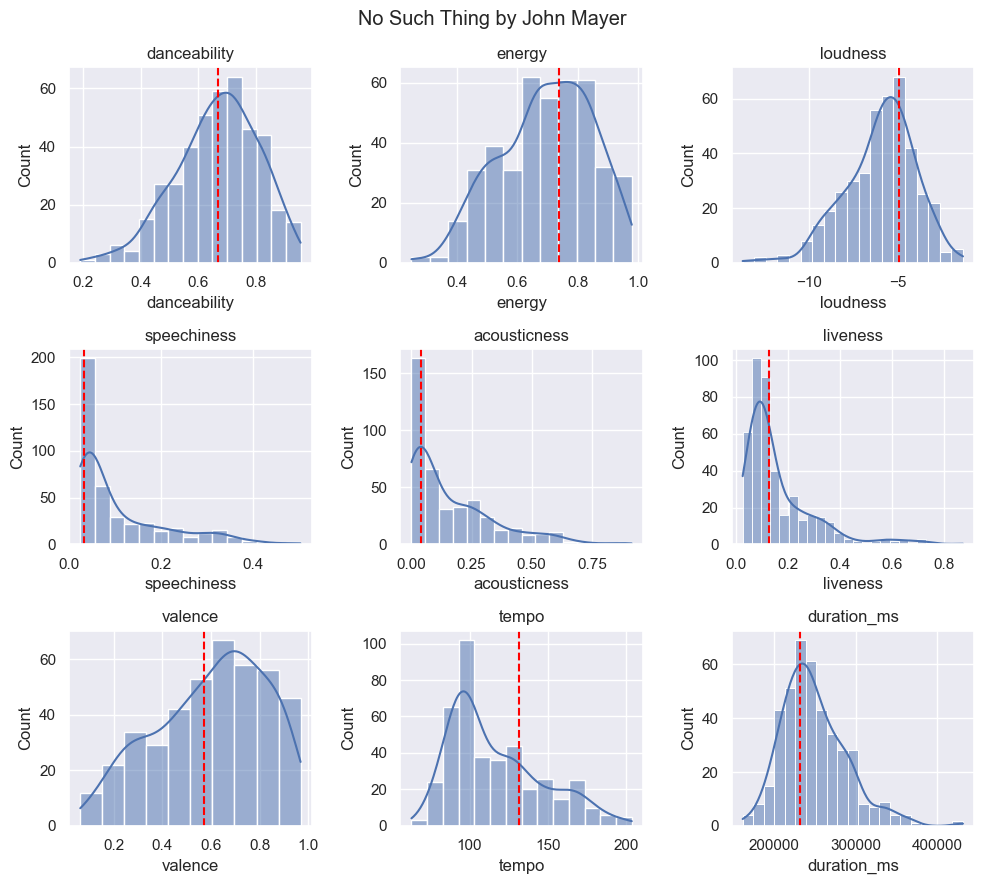

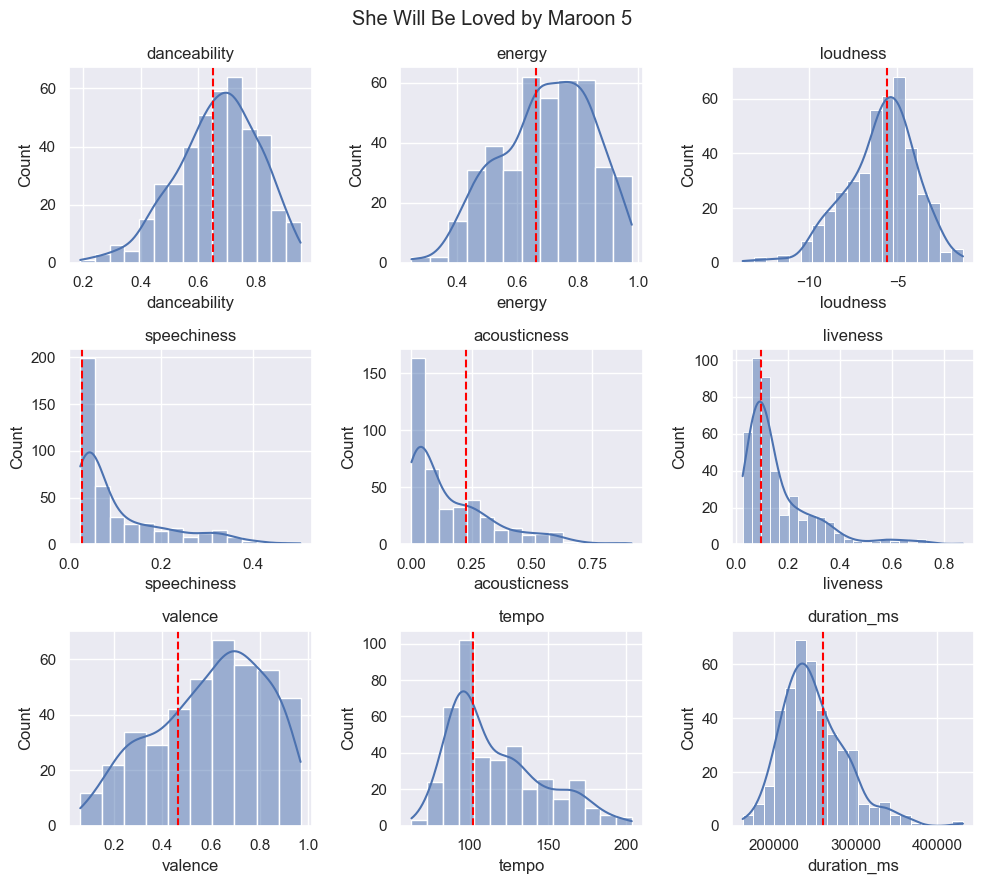

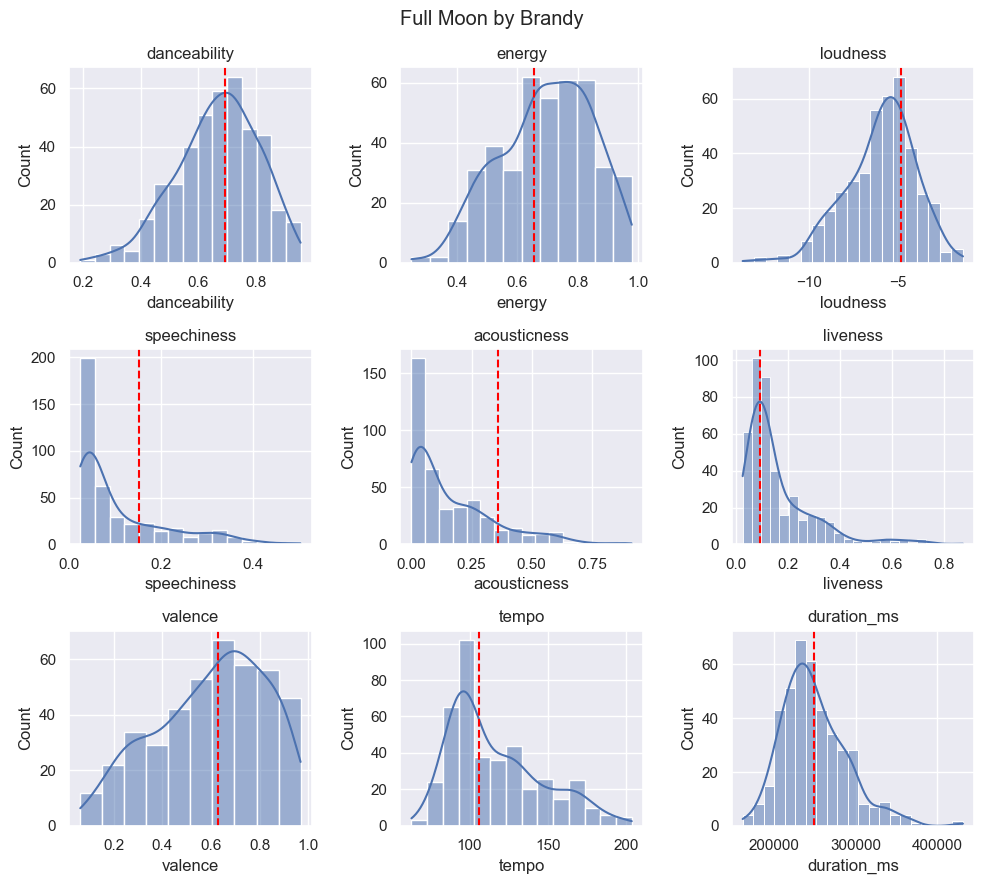

In [20]:
obvious = df.sort_values('obviouness').tail(3).sort_values('obviouness', ascending=False)
for id in obvious['id']:
    compare(df,id,X_cols)

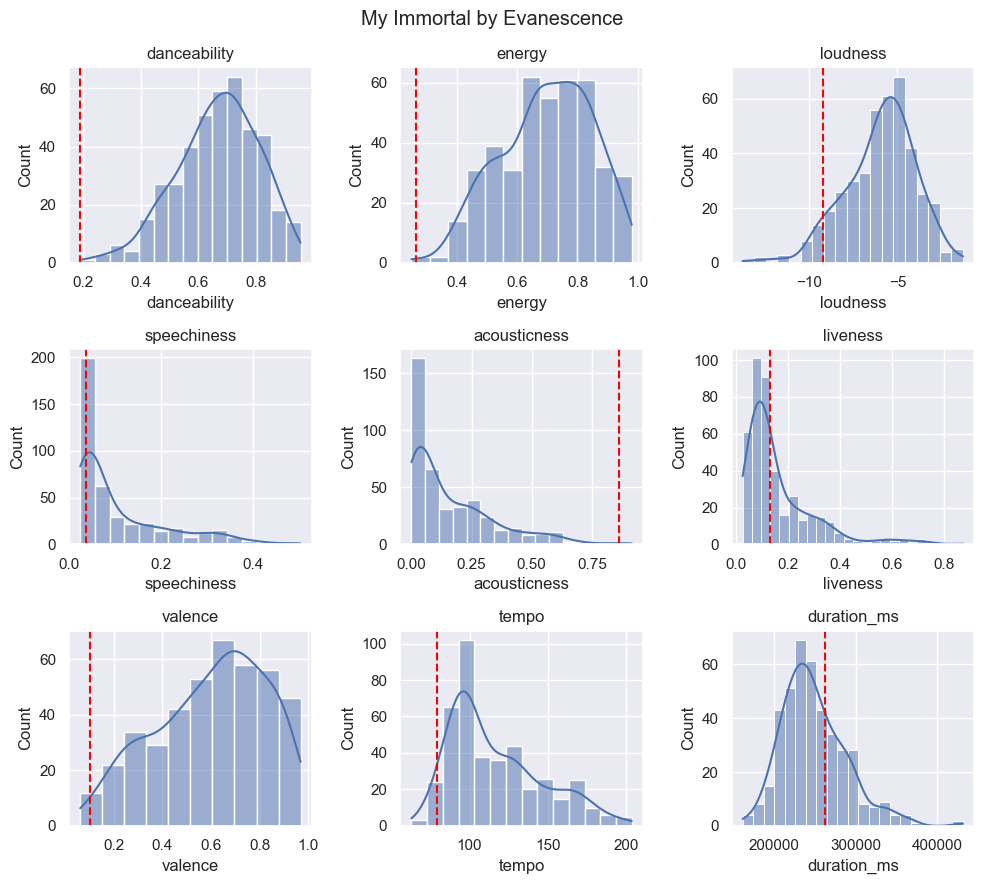

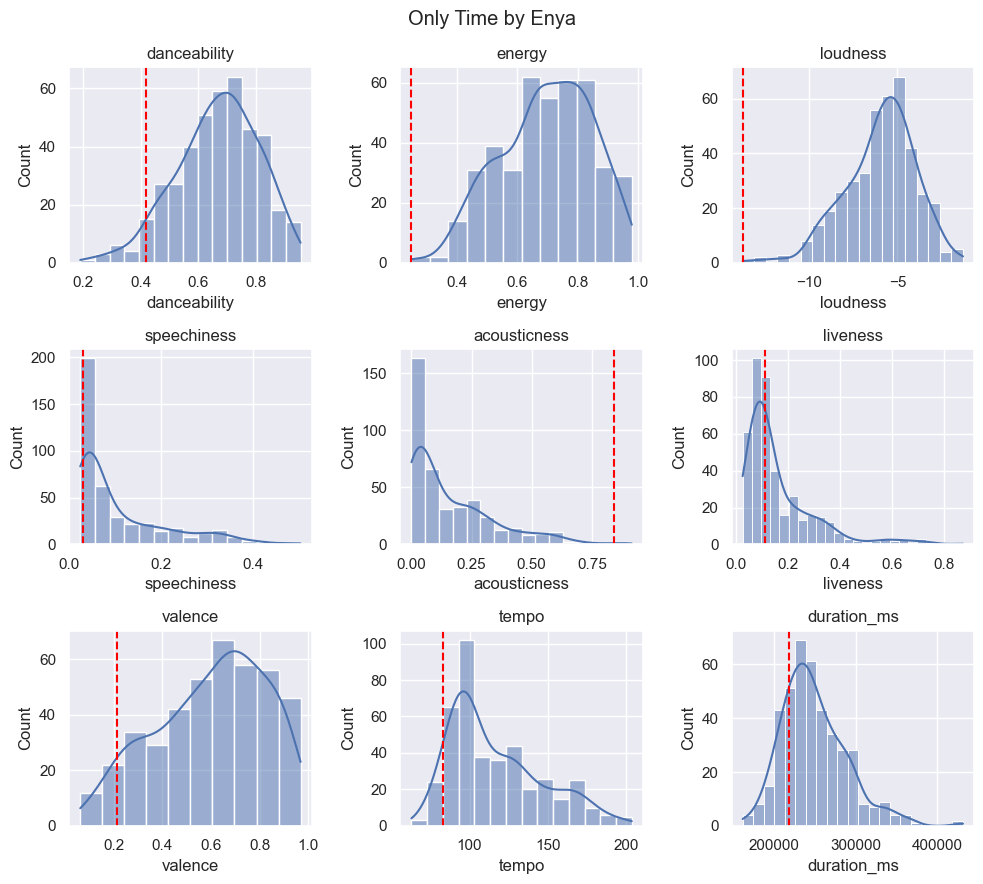

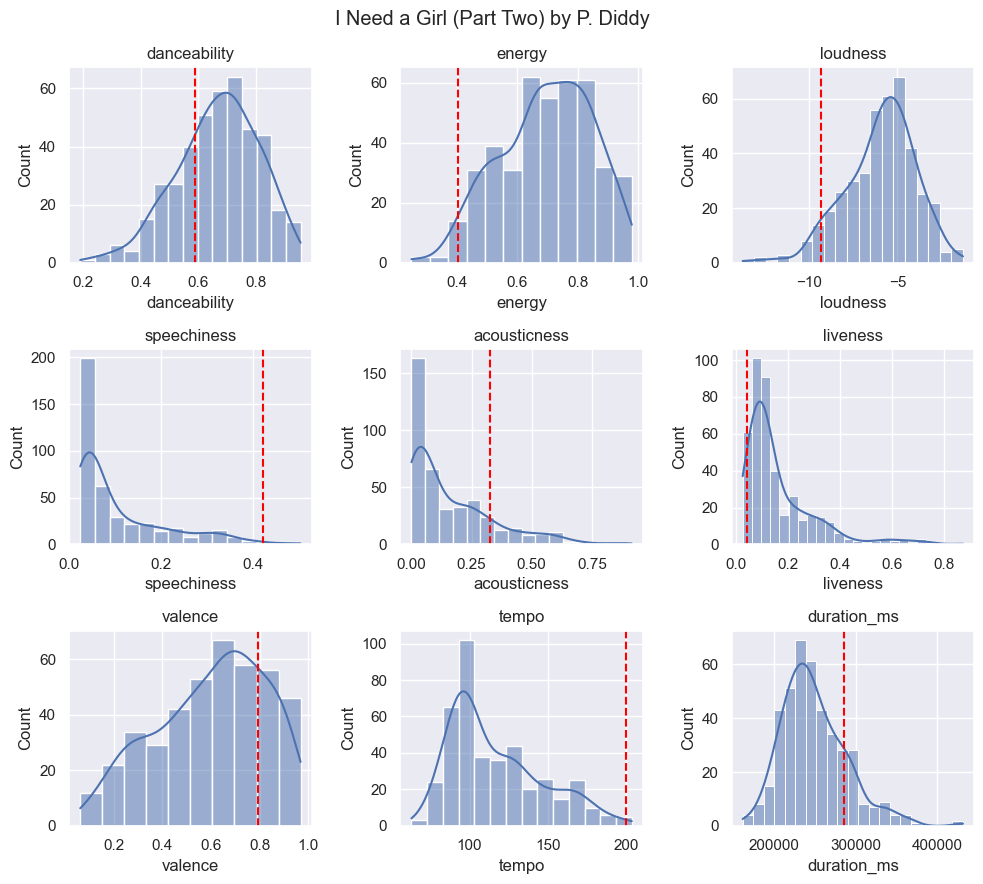

In [21]:
non_obvious = df.sort_values('obviouness').head(3)
for id in non_obvious['id']:
    compare(df,id,X_cols)

## Finding closest music from user preferences:

In [24]:
danceability = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='danceability')
energy = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='energy')
loudness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='loudness')
speechiness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='speechiness')
acousticness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='acousticness')
liveness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='liveness')
valence = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='valence')
display(danceability, energy, loudness, speechiness, acousticness, liveness, valence)

FloatSlider(value=0.5, description='danceability', max=1.0, step=0.01)

FloatSlider(value=0.5, description='energy', max=1.0, step=0.01)

FloatSlider(value=0.5, description='loudness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='speechiness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='acousticness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='liveness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='valence', max=1.0, step=0.01)

In [28]:
user_options = [danceability.value, energy.value, loudness.value, speechiness.value, acousticness.value, liveness.value, valence.value]
features = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence']
X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
distances = np.linalg.norm(X_scaled - user_options, axis=1)
df['distance_from_user'] = distances
df.sort_values('distance_from_user').head(1)['uri'].values[0]

'spotify:track:21iEEekDSvQjVARSQ4dpXY'